# 多层感知机

我们已经介绍了包括线性回归和softmax回归在内的单层神经网络。然而深度学习主要关注多层模型。在本节中，我们将以多层感知机（multilayer perceptron，MLP）为例，介绍多层神经网络的概念


### 隐藏层

多层感知机在单层神经网络的基础上引入了一到多个隐藏层（hidden layer）。隐藏层位于输入层和输出层之间。图3.3展示了一个多层感知机的神经网络图，它含有一个隐藏层，该层中有5个隐藏单元。

.
<img src="./img/2-9.png">

在上图所示的多层感知机中，输入和输出个数分别为4和3，中间的隐藏层中包含了5个隐藏单元（hidden unit）。由于输入层不涉及计算，图3.3中的多层感知机的层数为2。由图3.3可见，隐藏层中的神经元和输入层中各个输入完全连接，输出层中的神经元和隐藏层中的各个神经元也完全连接。因此，多层感知机中的隐藏层和输出层都是全连接层。

你提到的内容是深度学习中多层感知机（Multilayer Perceptron, MLP）的基本结构与原理。下面我们将详细讲解整个过程。

### 多层感知机简介

多层感知机是一种前馈神经网络，包括输入层、一个或多个隐藏层以及输出层。每一层由若干神经元（或节点）组成，且层与层之间全连接。多层感知机通过在网络中添加一个或多个非线性隐藏层，使得网络能够学习更加复杂的数据表示。

### 数学表示

为了解释这个问题，我们用数学符号进行详细说明。给定一批小批量样本 $X \in \mathbb{R}^{n \times d}$，其中 $n$ 是批量大小，$d$ 是输入特征的维度。

假设这个多层感知机只有一个隐藏层，该隐藏层有 $h$ 个隐藏单元。我们可以将隐藏层的输出记为 $H \in \mathbb{R}^{n \times h}$。对于隐藏层和输出层（全连接层），其权重参数和偏差参数分别表示如下：

- 隐藏层的权重参数 $W_h \in \mathbb{R}^{d \times h}$ 和偏差参数 $b_h \in \mathbb{R}^{1 \times h}$。
- 输出层的权重参数 $W_o \in \mathbb{R}^{h \times q}$ 和偏差参数 $b_o \in \mathbb{R}^{1 \times q}$，其中 $q$ 是输出层的单元数或类别数。



假设我们有一个简单的任务：基于两个特征（例如长度和宽度）对花进行三种分类（例如分类为Setosa、Versicolour、Virginica，这是著名的Iris数据集）。

在这个例子中，我们的输入特征维度 $d = 2$（长度和宽度），输出的分类数 $q = 3$。

设想我们设计一个只有一个隐藏层的多层感知机，这个隐藏层设有 $h = 5$ 个隐藏单元。

### 步骤与参数：
1. **输入层**: 输入是一个小批量的样本 $X \in \mathbb{R}^{n \times 2}$，这里 $n$ 是批量大小，即一次性处理的样本数量。假设我们一次处理4个样本，那么 $X$ 的维度是 $(4, 2)$。
2. **隐藏层参数**: 我们有隐藏层的权重参数 $W_h \in \mathbb{R}^{2 \times 5}$ 和偏差参数 $b_h \in \mathbb{R}^{1 \times 5}$。权重参数 $W_h$ 的维度 $(2, 5)$ 表示每个输入特征连接到5个隐藏单元，$b_h$ 是偏差项，用于添加非线性。
3. **输出层参数**: 输出层的权重参数是 $W_o \in \mathbb{R}^{5 \times 3}$ 和偏差参数 $b_o \in \mathbb{R}^{1 \times 3}$。这里 $W_o$ 的维度 $(5, 3)$ 表示每个隐藏单元连接到3个输出分类，$b_o$ 是在输出层的另一个偏差项。



### 计算过程

1. 首先，输入 $X$ 与隐藏层的权重 $W_h$ 相乘，再加上偏差 $b_h$，得到隐藏层的线性变换结果。这个结果接着通过一个非线性激活函数（比如ReLU），得到隐藏层的输出 $H$。
   
   $$ H = \text{activation}(XW_h + b_h) $$

2. 然后，隐藏层的输出 $H$ 作为下一个全连接层（输出层）的输入，同样地，与输出层的权重 $W_o$ 相乘，再加上偏差 $b_o$，得到输出层的线性变换结果。如果是分类问题，通常在这之后还会应用一个softmax函数来得到分类的概率分布。
   
   $$ O = HW_o + b_o $$

### 讨论

如果我们直接将 $H$ 的计算代入 $O$ 中，得到的公式如下：

$$ O = (XW_h + b_h)W_o + b_o $$

这意味着如果不通过非线性激活函数，无论神经网络有多少层，输出都仅仅是输入的线性组合，无法捕捉到数据中的非线性关系。这也是为什么非线性激活函数在深度学习中至关重要的原因，它使得深度神经网络能够学习到非线性的映射。

所以，即便是添加更多的隐藏层，如果没有非线性激活函数，网络的表达能力仍然受限，等同于一个单层的线性模型。通过引入非线性激活函数，如ReLU、Sigmoid、Tanh等，多层网络才能够捕捉复杂的数据结构，解决非线性问题，大大增强模型的表达能力。


### 例子说明：

### 计算过程：
1. **计算隐藏层输出**: 首先，我们通过输入 $X$ 和隐藏层的权重 $W_h$ 以及偏差 $b_h$ 计算隐藏层的输出。如果假设激活函数为ReLU（表示为$\text{ReLU}(x) = \max(0, x)$），那么隐藏层的输出 $H$ 计算如下：   
$$ H = \text{ReLU}(XW_h + b_h) $$   
这里的加法代表矩阵中每行都加上偏差向量 $b_h$，$H$ 的维度是 $(4, 5)$。

2. **计算输出层输出**: 接着我们使用隐藏层的输出 $H$，通过输出层的权重 $W_o$ 和偏差 $b_o$ 计算最终分类的得分：   
$$ O = HW_o + b_o $$   
在上述情况中，$O$ 的维度是 $(4, 3)$，意味着我们得到4个样本对于3个分类的得分。


如果具体数字如下：- 假设 $X$ 是一个 $(4, 2)$ 矩阵，表示4个样本，每个样本有2个特征。- $W_h$ 是 $(2, 5)$ 矩阵，$b_h$ 是 $(1, 5)$ 矩阵。- $W_o$ 是 $(5, 3)$ 矩阵，$b_o$ 是 $(1, 3)$ 矩阵。例如：
```text
X = [[1, 2],
     [1, 3],
     [2, 4],
     [2, 5]]

W_h = [[0.1, 0.2, 0.3, 0.4, 0.5],
       [0.5, 0.4, 0.3, 0.2, 0.1]]

b_h = [[0.1, 0.2, 0.3, 0.4, 0.5]]

W_o = [[0.1, 0.2, 0.3],
       [0.3, 0.2, 0.1],
       [0.1, 0.4, 0.5],
       [0.5, 0.4, 0.3],
       [0.3, 0.2, 0.1]]

b_o = [[0.1, 0.2, 0.3]]
```

使用上述数学公式，我们先计算隐藏层输出 $H$，然后使用 $H$ 计算最终输出 $O$。根据 $O$ 的值，我们可以继续使用softmax函数将得分转化为概率，还可以基于这个概率进行分类预测。注意，每一步我们都使用到了矩阵乘法、向量加法，以及非线性激活函数，这使得模型能够捕捉输入数据的复杂模式和关系。

Q: 我可以把含单隐藏层的感知机，理解为嵌套函数吗，就数学里面复合函数的概念

A: 是的，你完全可以把含单隐藏层的多层感知机（MLP）理解为数学中复合函数的概念。实际上，这种理解是非常准确且有助于深入理解神经网络工作原理的。

A: 在数学中，复合函数是指由两个或更多函数通过复合操作（即一个函数的输出成为另一个函数的输入）形成的函数。对于含单隐藏层的多层感知机来说，这一概念可以被描述为以下几个步骤的嵌套：

1. **第一步（输入到隐藏层的映射）**: 首先，输入数据 $X$ 通过权重矩阵 $W_h$ 和偏差向量 $b_h$ 进行线性变换，然后通过一个非线性函数（激活函数），产生隐藏层 $H$ 的输出。这可以被看作是第一个函数 $f_1$，它的表达式是：$H = f_1(X) = \text{activation}(XW_h + b_h)$。

2. **第二步（隐藏层到输出层的映射）**: 随后，隐藏层的输出 $H$ 经过另一个线性变换（通过权重矩阵 $W_o$ 和偏差向量 $b_o$），然后可能会通过另一个激活函数（对于回归问题可能直接是线性输出，对于分类问题可能是softmax函数）得到最终输出 $O$。这可以被看作第二个函数 $f_2$，其表达式是：$O = f_2(H) = HW_o + b_o$。

A: 因此，从整体来看，多层感知机的过程可以被视为这两个函数的复合：$O = f_2(f_1(X))$。这种嵌套的函数结构揭示了多层神经网络能够学习复杂非线性模式的原因：每一层的非线性变换都增加了模型的整体非线性表示能力，使得网络能捕捉更多更复杂的数据特征和关系。

A: 在深度学习中，我们通过添加更多的隐藏层和使用不同的激活函数来进一步扩展这种复合函数结构，构建出更加复杂和强大的深度神经网络模型。

Q: 那是不是多层神经网络就是一层层的函数嵌套，然后梯度下降更新每一层的参数呢
A: 是的，你的理解是正确的。多层神经网络（也称为深度学习模型）本质上可以被视为一系列函数的复合，其中每一层的输出都是下一层的输入，构成了一系列嵌套的函数关系。整个网络的学习过程，即模型训练过程，就是通过梯度下降（或其变体）算法来更新每一层中参数的过程，以最小化损失函数（表示模型预测值与真实值之间差异的函数）。

函数嵌套

在多层神经网络中，每一层都可以看作是一个进行特定变换的函数。例如，对于一个有$L$层的神经网络：

- 每一层$l$（对于 $1 \leq l \leq L$）可以表示为一个函数$f_l$，它将输入值$x_{l-1}$映射到输出值$x_l$，即 $x_l = f_l(x_{l-1}; \theta_l)$，其中$\theta_l$表示该层的参数（权重和偏置）。
- 整个网络从输入$x_0$到输出$x_L$的映射可以看作是这些函数的复合：$x_L = f_L(...f_2(f_1(x_0; \theta_1); \theta_2)...; \theta_L)$。

梯度下降和参数更新

梯度下降算法用于在训练过程中调整网络参数$\theta_l$。这个过程分为以下几个步骤：

1. **前向传播（Forward Propagation）**：输入数据沿着网络前向传递，经过每一层的变换，直到得到输出，然后计算输出与真实值之间的损失。

2. **反向传播（Back Propagation）**：计算损失函数关于每一层参数的梯度。这是通过链式法则从输出层向输入层逐层反向计算梯度实现的。

3. **参数更新**：一旦获得了损失函数关于每一层参数的梯度，就根据梯度下降算法更新每一层的参数。更新的基本形式是：$\theta_l = \theta_l - \eta \frac{\partial \text{Loss}}{\partial \theta_l}$，其中$\eta$是学习率，$\frac{\partial \text{Loss}}{\partial \theta_l}$是损失函数关于当前层参数的梯度。

通过反复执行上述步骤，网络通过逐渐调整其参数来学习输入数据的复杂特征，最终实现从输入到输出的有效映射。

### 总结

因此，多层神经网络的训练确实涉及到函数嵌套和参数的迭代更新，其中梯度下降及其变种用于指导这些更新，以达到逐渐减小模型预测和真实数据之间差异的目的。这个过程体现了深度学习中的核心思想和实现机制。

# 这里看原书的例子

原书的例子这里是隐藏层和输入层都是全连接层，最后联立后发现等价为同一个全连接层

.
<img src="./img/2-10.png">

.
这里就类似于， $ y=kx+b $ 和 $ z = ay + c $ ，他们复合后依然是 $ z = akx + ab + c $ ，依然是一个线性函数

### 激活函数

上述问题的根源在于全连接层只是对数据做仿射变换（affine transformation），而多个仿射变换的叠加仍然是一个仿射变换。解决问题的一个方法是引入非线性变换，例如对隐藏变量使用按元素运算的非线性函数进行变换，然后再作为下一个全连接层的输入。这个非线性函数被称为激活函数（activation function）。下面我们介绍几个常用的激活函数。

#### ReLu 函数
ReLU（rectified linear unit）函数提供了一个很简单的非线性变换。给定元素x，该函数定义为

$$ ReLU(x) = max(x, 0) $$

可以看出，ReLU函数只保留正数元素，并将负数元素清零。为了直观地观察这一非线性变换，我们先定义一个绘图函数xyplot。

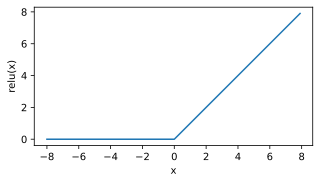

In [3]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pylab as plt
import sys
import d2lzh_pytorch as d2l

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = x.relu()

def xyplot(x_vals, y_vals, name):
    d2l.set_figsize(figsize=(5, 2.5))
    d2l.plt.plot(x_vals.detach().numpy(), y_vals.detach().numpy())
    d2l.plt.xlabel('x')
    d2l.plt.ylabel(name + '(x)')
    
xyplot(x, y, 'relu')

显然，当输入为负数时，ReLU函数的导数为0；当输入为正数时，ReLU函数的导数为1。尽管输入为0时ReLU函数不可导，但是我们可以取此处的导数为0。下面绘制ReLU函数的导数。

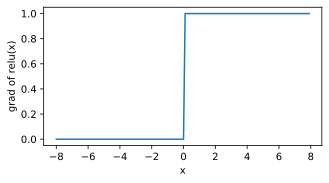

In [4]:
y.sum().backward()
xyplot(x, x.grad, 'grad of relu')


#### sigmoid 函数

可以将元素的值变换到 0 和 1 之间

